In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
for i in df.columns:
    print(i, df[i].unique())

id [ 9046 51676 31112 ... 19723 37544 44679]
gender ['Male' 'Female' 'Other']
age [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e-02 1.48e

In [5]:
df.drop(columns=['id'], inplace=True)

In [6]:
df['age'].astype(int)
df['heart_disease'].astype(int)

0       1
1       0
2       1
3       0
4       0
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: heart_disease, Length: 5110, dtype: int32

In [7]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

very small percentage of data is nan so we will replace the nan with the median value

In [8]:
df.loc[df['bmi'].isnull(),'bmi'] = df.loc[df['bmi'].isnull() == False,'bmi'].median()
df['gender'].replace({'Male':0, 'Female':1, 'Other':2}, inplace=True)
df['Residence_type'].replace({'Urban':0, 'Rural':1}, inplace=True)
df['smoking_status'].replace({'formerly smoked':1, 'never smoked':0, 'smokes':2, 'Unknown':3}, inplace=True)
df['work_type'].replace({'Private':0, 'Self-employed':1, 'Govt_job':2, 'children':3, 'Never_worked':4}, inplace=True)
df['ever_married'].replace({'Yes':1, 'No':0}, inplace=True)

In [9]:
df.dtypes

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

<Axes: >

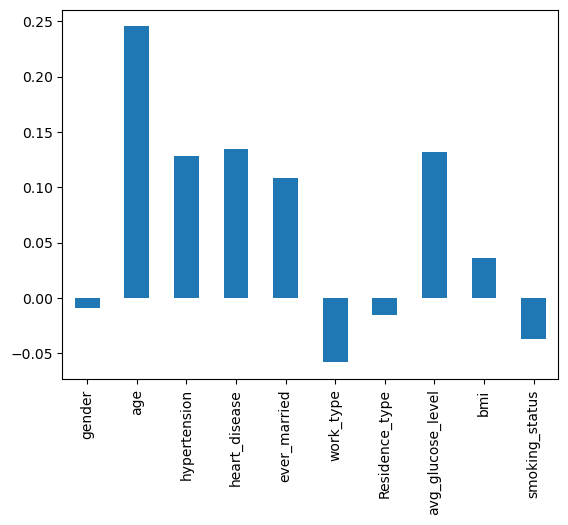

In [10]:
df.corr()['stroke'][:-1].plot(kind = 'bar')

<Axes: >

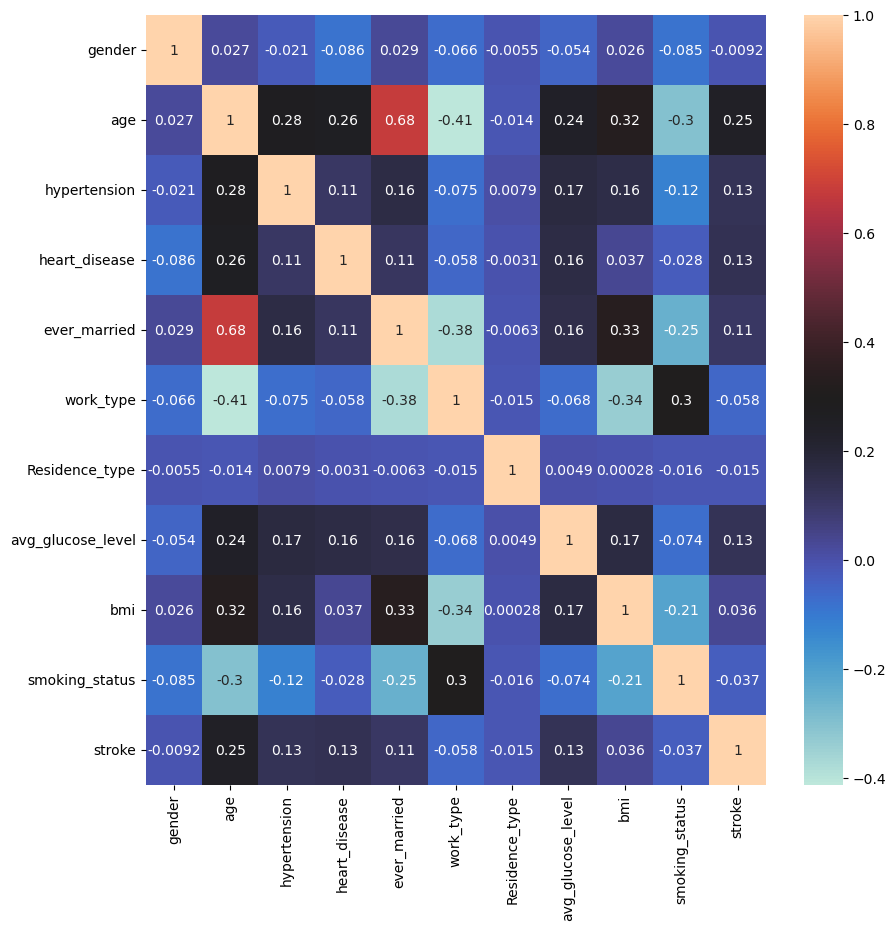

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap = 'icefire')

Text(0.5, 1.0, 'gluc distribution')

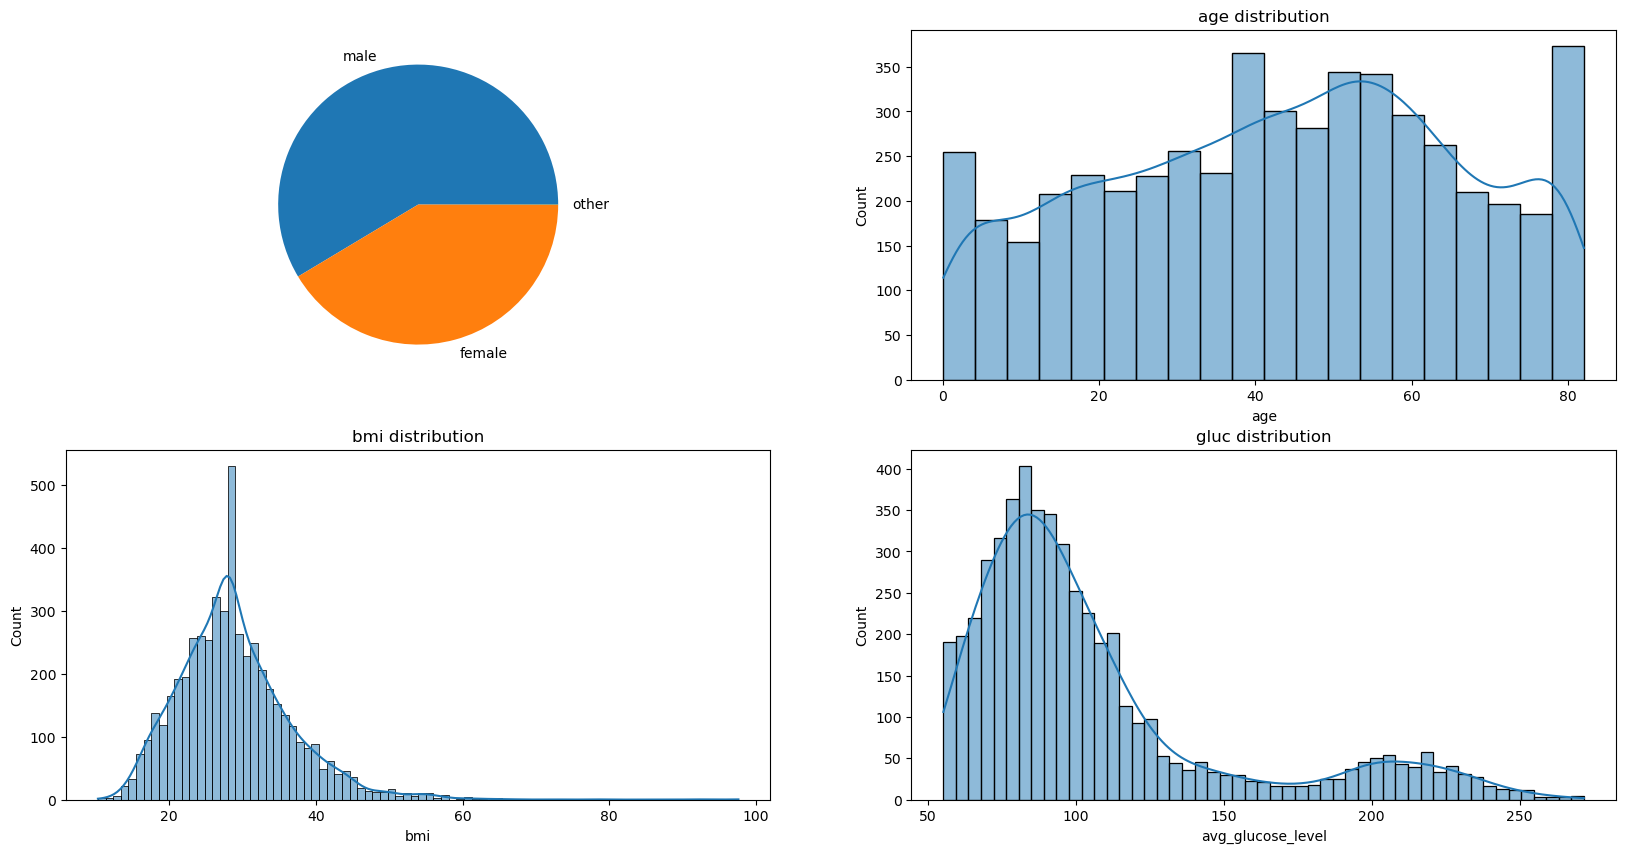

In [12]:
fig, ax = plt.subplots(2,2, figsize = (20,10))
ax[0,0].pie(df['gender'].value_counts(), labels = ['male', 'female', 'other'])
sns.histplot(data = df['age'], kde = True, ax = ax[0,1]).set_title('age distribution')
sns.histplot(data = df['bmi'], kde = True, ax = ax[1,0]).set_title('bmi distribution')
sns.histplot(data = df['avg_glucose_level'], kde = True, ax = ax[1,1]).set_title('gluc distribution')

In [13]:
df['age'] = pd.cut(x = df['age'], bins=[0,20,40,60,100], labels=[0,1,2,3])
df ['avg_glucose_level'] = pd.cut(x = df['avg_glucose_level'], bins=[0,70,120,180,250,df['avg_glucose_level'].max()], labels=[0,1,2,3,4])
df ['bmi'] = pd.cut(x = df['bmi'], bins=[0,20,30,40,df['bmi'].max()], labels=[0,1,2,3])

Text(0.5, 1.0, 'heart stroke with bmi')

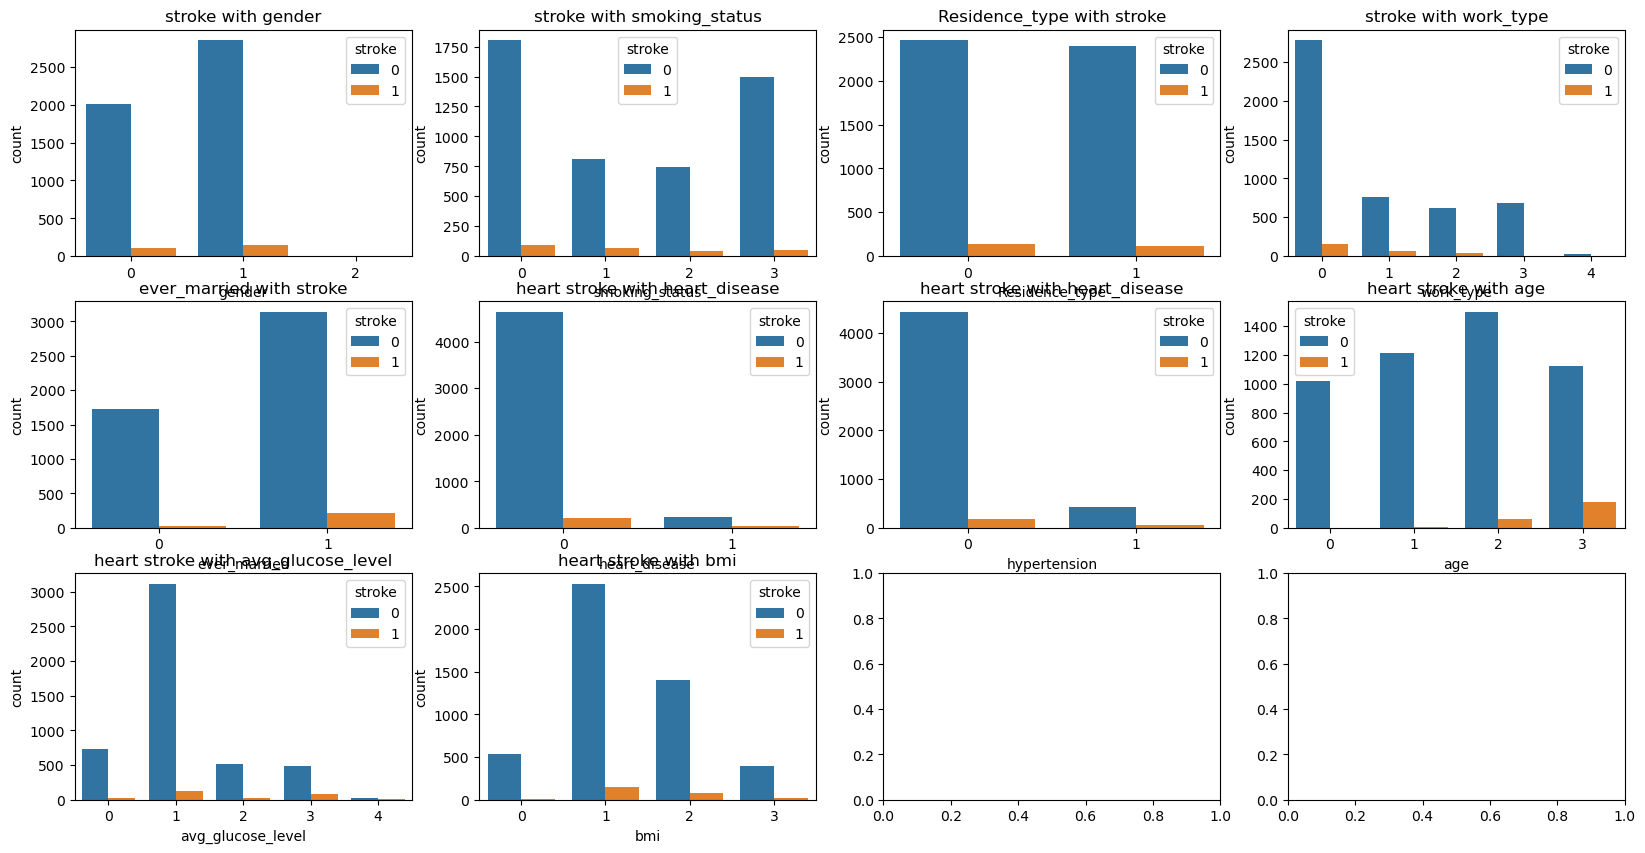

In [14]:
#cholesterol	gluc	smoke	alco	active
fig, ax = plt.subplots(3, 4, figsize = (20,10))
sns.countplot(x = 'gender', data = df, hue = 'stroke', ax = ax[0,0]).set_title('stroke with gender')
sns.countplot(x = 'smoking_status', data = df, hue = 'stroke', ax = ax[0,1]).set_title('stroke with smoking_status')
sns.countplot(x = 'Residence_type', data = df, hue = 'stroke', ax = ax[0,2]).set_title('Residence_type with stroke')
sns.countplot(x = 'work_type', data = df, hue = 'stroke', ax = ax[0,3]).set_title('stroke with work_type')
sns.countplot(x = 'ever_married', data = df, hue = 'stroke', ax = ax[1,0]).set_title('ever_married with stroke')
sns.countplot(x = 'heart_disease', data = df, hue = 'stroke', ax = ax[1,1]).set_title('heart stroke with heart_disease')
sns.countplot(x = 'hypertension', data = df, hue = 'stroke', ax = ax[1,2]).set_title('heart stroke with heart_disease')
sns.countplot(x = 'age', data = df, hue = 'stroke', ax = ax[1,3]).set_title('heart stroke with age')
sns.countplot(x = 'avg_glucose_level', data = df, hue = 'stroke', ax = ax[2,0]).set_title('heart stroke with avg_glucose_level')
sns.countplot(x = 'bmi', data = df, hue = 'stroke', ax = ax[2,1]).set_title('heart stroke with bmi')

In [15]:
def get_pvalue(df, target_col, col, values):
  table = []
  for value in values:
    n1 = df[df[target_col]==0].groupby(col)[target_col].count()[value]
    n2 = df[df[target_col]==1].groupby(col)[target_col].count()[value]
    table.append([n1, n2])

  chi2, p, dof, ex = chi2_contingency(table)
  return p

In [16]:
p = get_pvalue(df, 'stroke', 'gender',[0,1])
print("The p-value for gender is equal to {}".format(p))
p = get_pvalue(df, 'stroke', 'heart_disease',[0,1])
print("The p-value for heart_disease is equal to {}".format(p))
p = get_pvalue(df, 'stroke', 'smoking_status',[0,1,2,3])
print("The p-value for smoking_status is equal to {}".format(p))
p = get_pvalue(df, 'stroke', 'Residence_type',[0,1])
print("The p-value for Residence_type is equal to {}".format(p))
p = get_pvalue(df, 'stroke', 'ever_married',[0,1])
print("The p-value for ever_married is equal to {}".format(p))
p = get_pvalue(df, 'stroke', 'work_type',[0,1,2,3])
print("The p-value for work_type is equal to {}".format(p))
p = get_pvalue(df, 'stroke', 'hypertension',[0,1])
print("The p-value for hypertension is equal to {}".format(p))
p = get_pvalue(df, 'stroke', 'age',[0,1,2,3])
print("The p-value for age is equal to {}".format(p))
p = get_pvalue(df, 'stroke', 'avg_glucose_level',[0,1,2,3,4])
print("The p-value for avg_glucose_level is equal to {}".format(p))
p = get_pvalue(df, 'stroke', 'bmi',[0,1,2,3])
print("The p-value for bmi is equal to {}".format(p))

The p-value for gender is equal to 0.5598277580669416
The p-value for heart_disease is equal to 2.0887845685229236e-21
The p-value for smoking_status is equal to 2.0853997025008455e-06
The p-value for Residence_type is equal to 0.29833169286876987
The p-value for ever_married is equal to 1.6389021142314745e-14
The p-value for work_type is equal to 2.3082085976758925e-10
The p-value for hypertension is equal to 1.661621901511823e-19
The p-value for age is equal to 1.0034278763990481e-67
The p-value for avg_glucose_level is equal to 8.621994084938677e-23
The p-value for bmi is equal to 1.3735758664881338e-05


p-value for gender is 0.5598>>>0.05 so there is no relationship between gender and heart stroke on the other hand
p-value for gender is 2.088*e-21<<<0.05 so there is a relationship between heart disease and heart stroke

In [17]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import GridSearchCV

In [18]:
def model_pipeline(X_train, Y_train, X_valid, Y_valid, model):

    model.fit(X_train, Y_train)
    train_acc = model.score(X_train, Y_train)

    predictions = model.predict(X_valid)

    val_acc = accuracy_score(Y_valid, predictions)
    cm = confusion_matrix(Y_valid, predictions)
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    report = classification_report(Y_valid, predictions)

    #disp.plot()
    #plt.show()

    weighted_f1 = f1_score(Y_valid, predictions, average='weighted')

    return model, report, train_acc, val_acc, weighted_f1

In [31]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['stroke']),df['stroke'], test_size=0.4)
x_val, x_test, y_val, y_test = train_test_split(x_test,y_test, test_size=0.5)

In [32]:
for i in [1, 10, 100, 1000, 10000, 100000]:
    svm = SVC(C=i)
    _, _, _, val_acc, weighted_f1 = model_pipeline(x_train, y_train, x_val, y_val, svm)
    print(i, '', val_acc*100, weighted_f1*100)

c:\Users\mahmo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mahmo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mahmo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1  94.81409001956948 92.29015894421177


c:\Users\mahmo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mahmo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mahmo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


10  94.81409001956948 92.29015894421177
100  93.83561643835617 92.1023067670358
1000  92.75929549902152 91.74396586063564
10000  92.56360078277886 91.73688276637401
100000  92.56360078277886 91.73688276637401


In [33]:
svm = SVC(C=100)
svm.fit(pd.concat([x_train, x_val]), pd.concat([y_train, y_val]))
y_pred = svm.predict(x_test)
print('acc = ', np.mean(y_pred==y_test)*100)
confusion_matrix(y_test, y_pred)

acc =  94.6183953033268


array([[965,   8],
       [ 47,   2]], dtype=int64)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['stroke', 'gender', 'Residence_type']),df['stroke'], test_size=0.4)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5)

In [36]:
for i in [1, 10, 100, 1000, 10000, 100000]:
    svm = SVC(C=i)
    _, _, _, val_acc, weighted_f1 = model_pipeline(x_train, y_train, x_val, y_val, svm)
    print(i, '', val_acc*100, weighted_f1*100)

c:\Users\mahmo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mahmo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mahmo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1  95.10763209393346 92.72278675557003


c:\Users\mahmo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mahmo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mahmo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


10  95.10763209393346 92.72278675557003
100  94.6183953033268 92.47770762678095
1000  93.63992172211351 92.1267148661989
10000  93.44422700587084 92.02300373259578
100000  93.44422700587084 92.02300373259578


In [37]:
svm = SVC(C=10)
svm.fit(pd.concat([x_train, x_val]), pd.concat([y_train, y_val]))
y_pred = svm.predict(x_test)
print('acc = ', np.mean(y_pred==y_test)*100)
confusion_matrix(y_test, y_pred)

acc =  95.30332681017613


array([[974,   0],
       [ 48,   0]], dtype=int64)

removing gender and Residence_type improve accuracy which match our p-values